# Gravitational waves in general relativity XII Correspondence between toroidal and cylindrical waves by Marder
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

There are several metrics in this paper and for now we only do calculations for metric 18 which is Wey's axially symmetric static metric.  PLEASE NOTE CONVENTION FOR RIEMANN AND WEYL TENSORS NEEDS TO BE CHECKED.  NOT SURE WHICH INDICES ARE UP OR DOWN.  The two constaint equations and one evolution equation are given at the bottom but they have not been solved yet.

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1972.0034

In [18]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [19]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [20]:
T,R,phi,Z,dT,dR,dphi,dZ,gamma,psi = symbols( 'T R phi Z dT dR dphi dZ gamma psi' ) 

In [21]:
psi = Function('psi')(R,Z)
psi

In [22]:
gamma = Function('gamma')(R,Z)
gamma

In [23]:
variables = Matrix( [T,R,phi,Z] )
variables

⎡T⎤
⎢ ⎥
⎢R⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣Z⎦

In [24]:
differentials = Matrix( [dT,dR,dphi,dZ] ) 
differentials

⎡ dT ⎤
⎢    ⎥
⎢ dR ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dZ ⎦

In [25]:
lineElement = expand(exp(2*psi)*dT**2 - R**2 * exp(-2*psi) * dphi**2 - exp(2*(gamma-psi)) * (dR**2 + dZ**2))
lineElement

In [26]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅ψ(R, Z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              2⋅γ(R, Z)  -2⋅ψ(R, Z)                                          ⎥
⎢    0       -ℯ         ⋅ℯ                   0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅ψ(R, Z)                         ⎥
⎢    0                  0             -R ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        2⋅γ(R, Z)  -2⋅ψ(R, Z)⎥
⎣    0                  0                    0         -ℯ         ⋅ℯ          ⎦

In [27]:
import sympy

In [28]:
m = sympy.Array(g)
m

⎡ 2⋅ψ(R, Z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              2⋅γ(R, Z)  -2⋅ψ(R, Z)                                          ⎥
⎢    0       -ℯ         ⋅ℯ                   0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅ψ(R, Z)                         ⎥
⎢    0                  0             -R ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        2⋅γ(R, Z)  -2⋅ψ(R, Z)⎥
⎣    0                  0                    0         -ℯ         ⋅ℯ          ⎦

In [29]:
from einsteinpy.symbolic import *

In [30]:
syms = sympy.symbols("T R phi Z")
T,R,phi,Z = syms

In [32]:
metric = MetricTensor(m,syms)

In [33]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡ -2⋅γ(R, Z) + 4⋅ψ(R, Z) ∂                                                    
⎢⎡             ∂               ∂          ⎤  ⎢ℯ                      ⋅──(ψ(R, Z))              0                           
⎢⎢     0       ──(ψ(R, Z))  0  ──(ψ(R, Z))⎥  ⎢                        ∂R                                                   
⎢⎢             ∂R              ∂Z         ⎥  ⎢                                                                             
⎢⎢                                        ⎥  ⎢                                     ∂             ∂                         
⎢⎢∂                                       ⎥  ⎢                 0                   ──(γ(R, Z)) - ──(ψ(R, Z))               
⎢⎢──(ψ(R, Z))       0       0       0     ⎥  ⎢                                     ∂R            ∂R                        
⎢⎢∂R                                      ⎥  ⎢                                                                             
⎢⎢      

In [34]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                                                           
⎢⎜   ∂                ∂             ∂          ⎟  -2⋅γ(R, Z) + 4⋅ψ(R, Z)                                                   
⎢⎜R⋅───(ψ(R, Z)) + R⋅───(ψ(R, Z)) + ──(ψ(R, Z))⎟⋅ℯ                                                                         
⎢⎜    2                2            ∂R         ⎟                                                                           
⎢⎝  ∂R               ∂Z                        ⎠                                                                           
⎢───────────────────────────────────────────────────────────────────────                                                   
⎢                                   R                                                                                      
⎢                                                                                                                          
⎢       

In [35]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡⎛      2                2                           2           2                           2           2                 
⎢⎜     ∂                ∂               ⎛∂          ⎞           ∂               ⎛∂          ⎞           ∂                 ∂
⎢⎜- R⋅───(γ(R, Z)) - R⋅───(γ(R, Z)) - R⋅⎜──(ψ(R, Z))⎟  + 2.0⋅R⋅───(ψ(R, Z)) - R⋅⎜──(ψ(R, Z))⎟  + 2.0⋅R⋅───(ψ(R, Z)) + 2.0⋅─
⎢⎜      2                2              ⎝∂R         ⎠            2              ⎝∂Z         ⎠            2                ∂
⎢⎝    ∂R               ∂Z                                      ∂R                                      ∂Z                  
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                              R                                           
⎢                                                                                                                          
⎢       

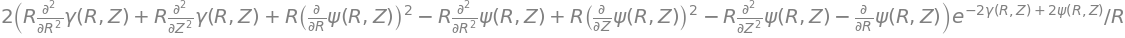

In [25]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [26]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [27]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

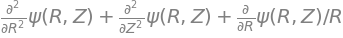

In [50]:
equation20 =expand((1/R)*Ric.tensor()[0,0].args[1])
equation20

In [42]:
equation21a = Eq(diff(gamma,R),solve( simplify(einst.tensor())[1,1], diff(gamma,R) )[0] )
equation21a

In [51]:
equation21b = Eq(diff(gamma,Z),solve( simplify(einst.tensor())[3,1], diff(gamma,Z) )[0] )
equation21b

In [54]:
fieldEquations = Matrix([equation20,equation21a,equation21b])
fieldEquations

⎡                                  ∂              ⎤
⎢      2              2            ──(ψ(R, Z))    ⎥
⎢     ∂              ∂             ∂R             ⎥
⎢    ───(ψ(R, Z)) + ───(ψ(R, Z)) + ───────────    ⎥
⎢      2              2                 R         ⎥
⎢    ∂R             ∂Z                            ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(R, Z)) = R⋅⎜⎜──(ψ(R, Z))⎟  - ⎜──(ψ(R, Z))⎟ ⎟⎥
⎢∂R              ⎝⎝∂R         ⎠    ⎝∂Z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(R, Z)) = 2⋅R⋅──(ψ(R, Z))⋅──(ψ(R, Z))    ⎥
⎣    ∂Z                ∂R          ∂Z             ⎦